In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar o dataset
df = pd.read_csv("ecommerce_sales.csv")

# Ver linhas
df


,sale_id,marketing_spend,website_traffic,conversion_rate,avg_product_rating,discount_percentage,num_products,avg_price,customer_reviews,return_rate,product_category,competition_level,seasonality,free_shipping,payment_methods,mobile_traffic_pct,monthly_sales
0,SALE00022,5736.77,15473.0,5.05,2.34,25,90,129.97,795.0,10.48,Fashion,Medium,Low,No,Credit Card,64.76,8302.85
1,SALE00633,6553.71,16501.0,7.33,3.58,10,37,118.24,956.0,NaN,Fashion,Medium,Medium,Yes,PayPal,69.99,8460.42
2,SALE01551,NaN,12624.0,5.82,2.56,15,499,97.37,635.0,NaN,Home,Medium,High,Yes,PayPal,79.56,7493.05
3,SALE00391,7141.07,21362.0,4.82,2.90,20,128,64.31,794.0,11.13,Home,Medium,Low,Yes,Bank Transfer,82.55,8258.81
4,SALE00375,1232.50,17901.0,4.01,3.66,0,429,161.47,933.0,10.17,Fashion,Medium,High,No,Credit Card,66.19,6151.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2505,SALE01739,5175.62,19629.0,4.58,2.54,15,164,173.26,NaN,8.38,Books,Low,Medium,No,Debit Card,61.93,7283.38
2506,SALE01661,4739.66,16904.0,4.39,2.46,10,131,66.98,783.0,NaN,Electronics,Medium,Medium,Yes,Bank Transfer,75.46,7521.35
2507,SALE02236,NaN,9102.0,4.07,2.83,15,272,181.83,81.0,8.69,Electronics,High,Medium,Yes,Credit Card,64.82,6882.39
2508,SALE01398,3524.01,7275.0,NaN,2.27,0,35,78.70,970.0,7.54,Electronics,Low,Medium,No,Debit Card,65.91,7818.35


In [ ]:
df.info()
df.describe(include='all').T

# Esses dois comandos servem pra ver: 

# Quais colunas são numéricas, quais são de texto. 
# Se tem valores vazios (NaN). 
# A média, mínimo e máximo de cada variável. 


In [2]:
df.isna().sum().sort_values(ascending=False)
df.duplicated().sum()

# Verificar valores únicos em colunas categóricas

np.int64(0)

In [ ]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribuição de {col}")
    plt.show()

# Isso mostra se os valores estão concentrados num ponto ou espalhados.

In [ ]:
for col in ['marketing_spend', 'website_traffic', 'avg_price', 'monthly_sales']:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col])
    plt.title(f"Outliers em {col}")
    plt.show()

# O boxplot é aquele gráfico que mostra a “caixinha” com os valores médios e os pontinhos isolados que são extremos. 
# Esses pontinhos são os possíveis outliers. 
# Exemplo: uma loja que gastou 1 milhão em marketing enquanto a maioria gasta 50 mil. 

In [ ]:
plt.figure(figsize=(10,8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de Correlação entre Variáveis Numéricas")
plt.show()

# Esse mapa de calor (heatmap) mostra como as variáveis se relacionam entre si.

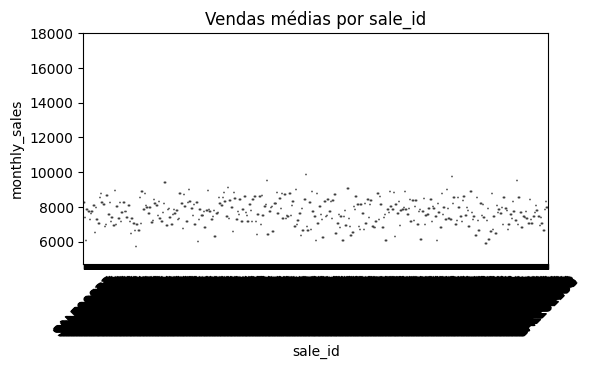

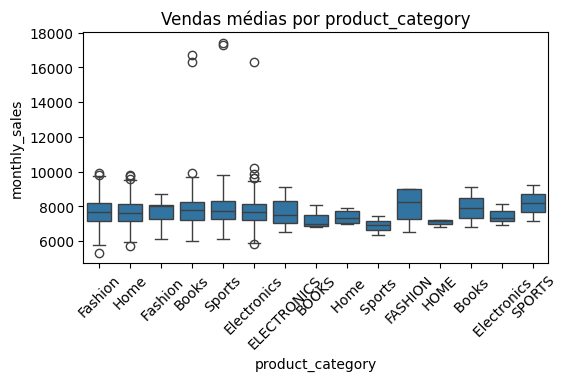

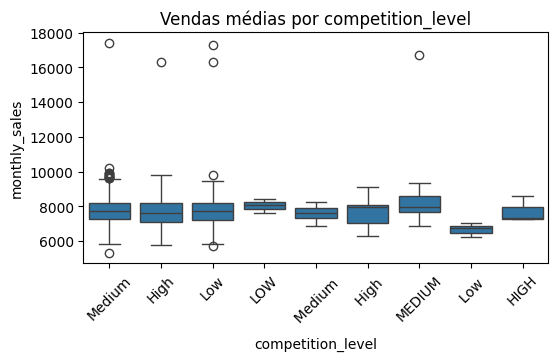

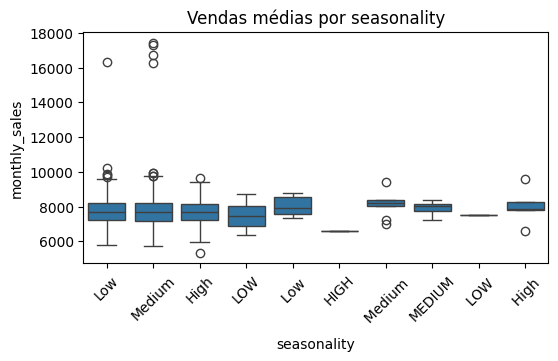

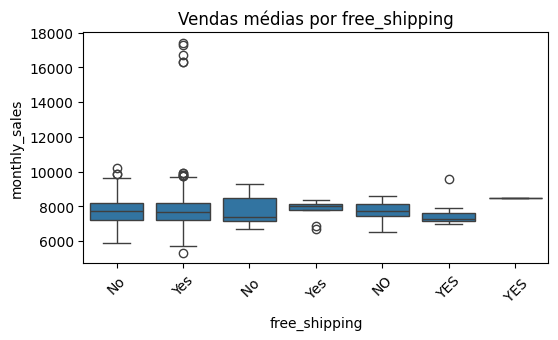

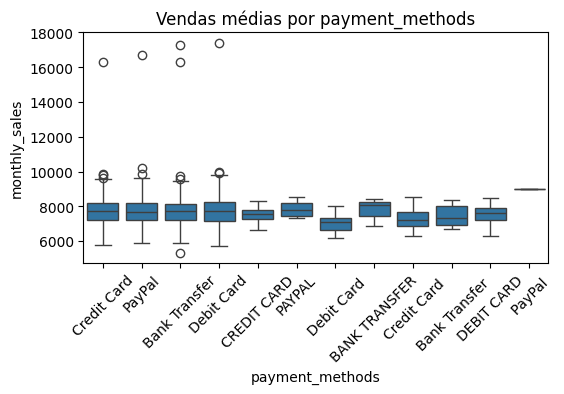

In [4]:
cat_cols = df.select_dtypes(include=['object']).columns

for col in cat_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=col, y='monthly_sales', data=df)
    plt.title(f"Vendas médias por {col}")
    plt.xticks(rotation=45)
    plt.show()

# O boxplot é aquele gráfico que mostra a “caixinha” com os valores médios e os pontinhos isolados que são extremos. 
# Esses pontinhos são os possíveis outliers. 
# Exemplo: uma loja que gastou 1 milhão em marketing enquanto a maioria gasta 50 mil. 

### 🔍 Conclusões da Etapa 1 (EDA)

- `marketing_spend`, `website_traffic` e `conversion_rate` estão fortemente ligados a `monthly_sales`.
- Algumas variáveis têm outliers (ex.: `avg_price`, `return_rate`).
- `free_shipping` parece aumentar as vendas médias.
- `product_category` e `seasonality` mostram padrões de variação importantes.
- Próximos passos: tratar valores ausentes e outliers na Etapa 2.


In [3]:
import pandas as pd

# Lê novamente o dataset original
df = pd.read_csv("ecommerce_sales.csv")

# (opcional) faz qualquer filtro ou seleção se quiser guardar só algumas colunas

# Salva o dataset 'explorado' (snapshot atual)
df.to_csv("dataset_explorado.csv", index=False)

print("Dataset explorado salvo com sucesso!")


Dataset explorado salvo com sucesso!
